In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from collections import Counter
from prayer_leiden import *

import seaborn as sns
import re

from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_distances , euclidean_distances


In [2]:
book_type='manuscript'

path = f'{book_type}_books.json'
json_file = open(path)
json_data = json.load(json_file)
titles = json_data['titles']
book_texts = json_data['book_texts']

In [3]:
min_nr_texts = 3

text_freq = Counter()
books = []

for book in book_texts:
    texts = book_texts[book]
    if len(texts)>min_nr_texts:
        text_freq.update(texts)
        books.append(book)

corpus = list(text_freq.keys())
print(f'{len(corpus)} texts')

rows = []

for book in book_texts:
    texts = book_texts[book]
    if len(texts)>3:
        book_freq = Counter(texts)
        row = []
        row.append(book)
        for text in corpus:
            row.append(book_freq.get(text,0))
        rows.append(row)
        
    
columns = ['book']
columns.extend(corpus)
    
book_text_matrix = pd.DataFrame(rows,columns=columns)
book_text_matrix = book_text_matrix.set_index('book')
print(book_text_matrix.shape)

1453 texts
(187, 1453)


In [4]:
from sklearn.metrics.pairwise import cosine_similarity , euclidean_distances

matrix = cosine_similarity(book_text_matrix)

cosine_df = pd.DataFrame.from_records(matrix,columns=books)

replacements = dict()
for i,h_id in enumerate(books):
    replacements[i]=h_id
    
cosine_df = cosine_df.rename(replacements)
cosine_df

,130486,143884,124886,134009,124884,124883,142711,135263,134472,142368,...,124937,124830,130268,124930,124929,128079,124860,128535,128489,125714
130486,1.000000,0.167248,0.104828,0.099627,0.159586,0.163430,0.082690,0.067267,0.027196,0.046225,...,0.209657,0.046225,0.138675,0.084921,0.064972,0.052414,0.169842,0.000000,0.125436,0.091192
143884,0.167248,1.000000,0.000000,0.216612,0.198273,0.284268,0.179787,0.146254,0.000000,0.000000,...,0.113961,0.100504,0.100504,0.123091,0.094176,0.227921,0.246183,0.134840,0.181818,0.000000
124886,0.104828,0.000000,1.000000,0.000000,0.124274,0.178174,0.056344,0.045835,0.148250,0.000000,...,0.142857,0.125988,0.000000,0.000000,0.000000,0.000000,0.000000,0.169031,0.000000,0.000000
134009,0.099627,0.216612,0.000000,1.000000,0.206689,0.084667,0.053548,0.065341,0.035223,0.059868,...,0.067884,0.119737,0.119737,0.000000,0.112199,0.203653,0.000000,0.080322,0.216612,0.000000
124884,0.159586,0.198273,0.124274,0.206689,1.000000,0.271244,0.122536,0.079745,0.064483,0.054800,...,0.062137,0.054800,0.109599,0.000000,0.128374,0.062137,0.134231,0.073521,0.049568,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128079,0.052414,0.227921,0.000000,0.203653,0.062137,0.178174,0.056344,0.045835,0.000000,0.251976,...,0.142857,0.251976,0.125988,0.077152,0.059028,1.000000,0.000000,0.000000,0.227921,0.000000
124860,0.169842,0.246183,0.000000,0.000000,0.134231,0.192450,0.121716,0.049507,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
128535,0.000000,0.134840,0.169031,0.080322,0.073521,0.105409,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.069843,0.000000,0.000000,1.000000,0.000000,0.000000
128489,0.125436,0.181818,0.000000,0.216612,0.049568,0.000000,0.044947,0.073127,0.000000,0.000000,...,0.000000,0.100504,0.100504,0.000000,0.141264,0.227921,0.000000,0.000000,1.000000,0.000000


<AxesSubplot:>

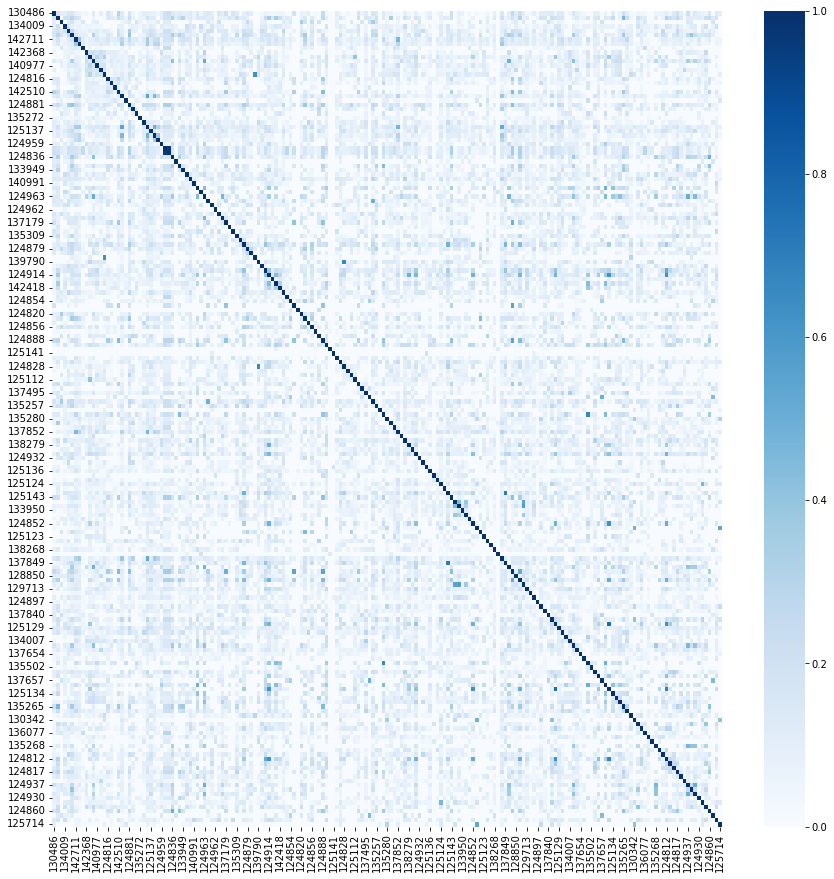

In [5]:
fig = plt.figure( figsize=( 15,15) )
sns.heatmap(cosine_df,cmap = 'Blues')

In [6]:
# book1 = '132420'
# book2 = '132407'

# print(titles[book1])
# print(titles[book2])

# texts1 = book_texts[book1]
# print(len(texts1))
# print(len(texts2))
# similarity = cosine_df.loc[book1][book2]
# texts2 = book_texts[book2]
# print(book1,book2)
# print(len(intersection(texts1,texts2)),cosine_df.loc[book1].sort_values(ascending=False)[0])
    


In [7]:
# edges = []
# nodes = []

# threshold = 0.8

# columns = cosine_df.columns

# for i,row in cosine_df.iterrows():
    
#     for column in columns:
#         if column != str(i):
#             if row[column]>threshold:
#                 if sorted([i,int(column)]) not in edges:
#                     edges.append( [i,int(column),row[column]] )

# for edge in edges:
#     if edge[0] not in nodes:
#         nodes.append( [edge[0],titles[str(edge[0])]])
#     if edge[1] not in nodes:
#         nodes.append( [edge[1],titles[str(edge[1])]])
                    
# with open('nodes1.csv','w') as nodes_file:
#     nodes_file.write('Id,Label\n')
#     for node in nodes:
#         nodes_file.write(f'{node[0]},"{node[1]}"\n')
        
# with open('edges1.csv','w') as edges_file:
#     edges_file.write('Source,Target,Similarity\n')
#     for edge in edges:
#         edges_file.write(f'{edge[0]},{edge[1]},{edge[2]}\n')
    

In [8]:
# from __future__ import print_function
# import time

# import numpy as np
# import pandas as pd

# from sklearn.datasets import fetch_openml
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# # This magic command is for Jupyter notebooks; skip or comment out if running as a Python script.
# # %matplotlib inline

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# import seaborn as sns


# # For reproducability of the results
# np.random.seed(42)

# rndperm = np.random.permutation(book_text_matrix.shape[0])

In [9]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(book_text_matrix)

df = pd.DataFrame()
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.04746355 0.03339904 0.03053007]


In [10]:
df.shape

(187, 3)

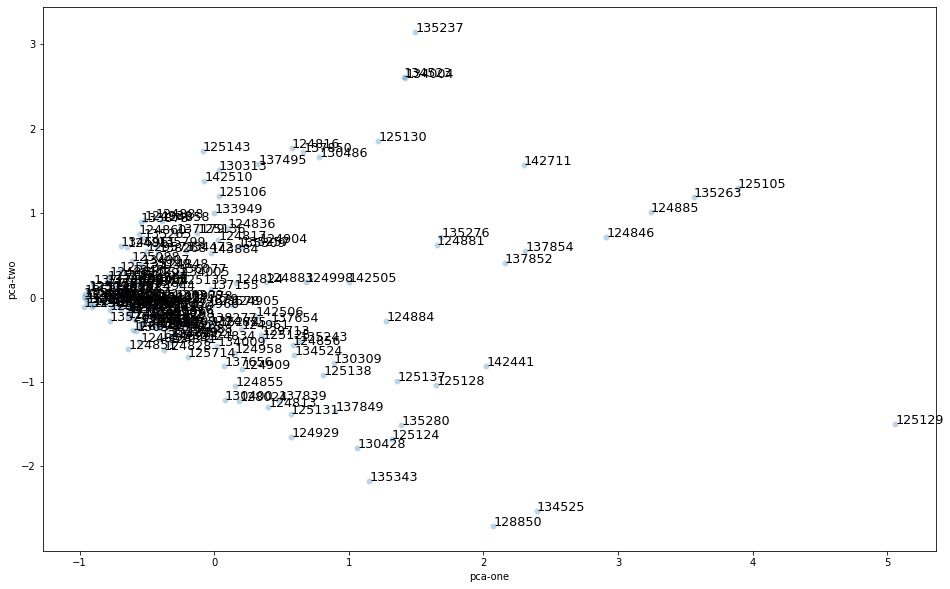

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)



for index, row in df.iterrows():
    plt.text( row['pca-one'],row['pca-two'],books[index], 
             fontsize=12.8 )


In [18]:
titles['125129']

'Getijden- en gebedenboek'

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity , euclidean_distances

# matrix = cosine_similarity(book_text_matrix)
# print(matrix)
# cosine_df = pd.DataFrame.from_records(matrix,columns=book_texts.keys())

# replacements = dict()
# for i,h_id in enumerate(list(book_texts.keys())):
#     replacements[i]=h_id
    
# cosine_df = cosine_df.rename(replacements)

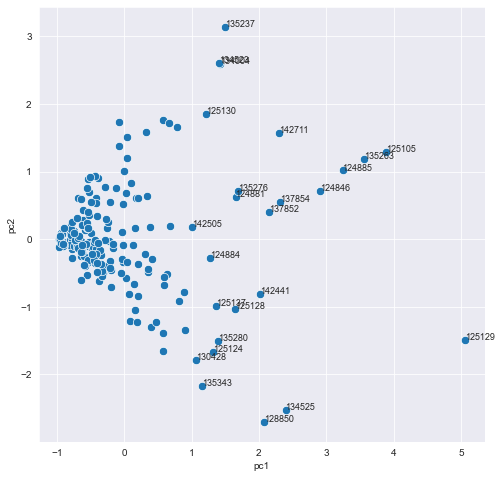

In [16]:
sns.set_style("darkgrid")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pc_df = pd.DataFrame(data = principal_components , columns = ['pc1', 'pc2'])


plt.figure(figsize = (8,8))
sns.scatterplot( data = pc_df , x = 'pc1', y = 'pc2' , s = 70  )

for i, row in pc_df.iterrows():
    if row['pc1'] > 1:
        plt.text( row['pc1']  , row['pc2']  , books[i] , size = 9) 

plt.savefig('pca_similarity.png',dpi=300)

In [ ]:

sns.set_style("darkgrid")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pc_df = pd.DataFrame(data = principal_components , columns = ['pc1', 'pc2'])


plt.figure(figsize = (8,8))
sns.scatterplot( data = pc_df , x = 'pc1', y = 'pc2' , s = 70  )

plt.ylim(-1, 2)
plt.xlim(-1,2)

for i, row in pc_df.iterrows():
    if (0 < row['pc1'] < 2) and (0.5 < row['pc2'] < 2):
        plt.text( row['pc1']  , row['pc2']  , titles[df.index[i]] , size = 14) 


plt.show()


In [ ]:
titles_list = []

for book_id in df.index:
    titles_list.append(titles[book_id])

In [ ]:

plt.figure(figsize = (15,70))

from scipy.cluster.hierarchy import linkage, dendrogram
linkages = linkage(df,'ward')

import matplotlib.pyplot as plt
dendrogram( linkages , labels = titles_list , orientation="right", leaf_font_size=8, leaf_rotation=20)
plt.tick_params(axis='x', which='both', bottom=False,
top=False, labelbottom=False)
plt.tight_layout()
plt.savefig('dendrogram.png',dpi=300)